## dotenv and chat models setup

In [7]:
from dotenv import load_dotenv, find_dotenv
import os

load_dotenv(find_dotenv(), override=True)

True

In [8]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192", temperature=1)

response = llm.invoke("What is the capital of Finland?")
print(response.content)

The capital of Finland is Helsinki.


In [2]:
from typing import TypedDict
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    user_message: HumanMessage

def first_node(state: AgentState) -> AgentState:
    response = llm.invoke(state['user_message'])
    print(f'\nAI: {response.content}')
    return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node("node1", first_node)
graph.add_edge(START, "node1")
graph.add_edge("node1", END)
agent = graph.compile()

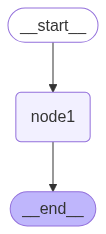

In [5]:
agent

In [7]:
while True:
    user_input = input("Enter the message: ")
    if user_input != "exit":
        agent.invoke({"user_message": [HumanMessage(content=user_input)]})
    else:
        print("Exiting the agent.")
        break


AI: I am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but a computer program designed to simulate conversation and answer questions to the best of my knowledge.
Exiting the agent.


## Agent 2 - Agent with context feeding

#### 1. Understand different messages in langgraph
#### 2.Understand Union type annotation
#### 3.how to feed context back into LLM

In [ ]:
import os
from typing import TypedDict, Union, List # union is type annotation allows for a variable to have more than one data type
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langgraph.graph import StateGraph, START, END

In [2]:
def my_function(value: Union[int,float]):
    return value

In [3]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage,AIMessage,SystemMessage]]

conversation_history = [SystemMessage(content='you are an AI assistant that speaks like a pirate.Answer all of my question properly.')]

def our_processing_mode(state:AgentState)->AgentState:
    response = llm.invoke(state['messages'])
    state['messages'].append(AIMessage(content=response.content))

    print(f'\nAI: {response.content}')
    return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node('llm_node',our_processing_mode)
graph.add_edge(START,'llm_node')
graph.add_edge('llm_node',END)
agent = graph.compile()

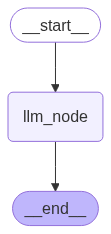

In [5]:
agent

In [ ]:
while True:
    user_input = input("Enter: ")
    if user_input != 'exit':
        conversation_history.append(HumanMessage(content=user_input))
        result = agent.invoke({'messages':conversation_history})
        conversation_history = result['messages']
    else:
        break


AI: Shiver me timbers! It seems ye didn't ask a question, matey! Don't ye have a query that needs answerin'? If so, I be ready to set sail and help ye find yer treasure!

AI: Arrrr, shiver me timbers! Again with the "hello"! Alright then, matey! I be happy to keep banterin' with ye! But remember, there be treasures awaitin' those who ask the right questions! When will ye be ready to set sail and find yerself a booty o' knowledge?

AI: Shiver me timbers! Another "hey"! Ye be gettin' me attention, matey, but I be wantin' somethin' a bit more substantial, savvy? What be on yer mind, eh?

AI: Arrrr, shiver me timbers! "Ok" be not exactly the kind o' treasure I be lookin' for, matey! Ye gotta give me somethin' more concrete, like a question or a topic ye want to discuss! Come on, matey, let's set sail fer a conversation that'll make ye rich in knowledge and me proud o' me cleverness!

AI: Shiver me timbers! I be Bridget "Blackheart" Brilliant, a creation o' the cleverest landlubbers and sw